# Project 2:  Holiday weather

by Carlos Avimadjessi, 08 November 2015

This is the project notebook for Week 2 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

There is nothing I like better than taking a holiday. In the winter I like to have a two week break in a country where I can be guaranteed sunny dry days. In the summer I like to have two weeks off relaxing in my garden in Brussels. However I'm often disappointed because I pick a fortnight when the weather is dull and it rains. So in this project I am going to use the historic weather data from the Weather Underground for London to try to predict two good weather weeks to take off as holiday next summer. Of course the weather in the summer of 2016 may be very different to 2014 but it should give me some indication of when would be a good time to take a summer break.

## Getting the data

If you haven't already downloaded the dataset for Brussels right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'Brussels' in the 'Location' input box and when the pop up menu comes up with the option 'London, United Kingdom' select it and then click on 'Submit'. 

When the next page opens click on the 'Custom' tab and selet the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed. Scroll to the end of the data  and then right click on the blue link labelled 'Comma Delimited File':

- if you are using the Safari Browser choose Download Linked File As ... 
- if you are using the Chrome Browser choose Save Link As ... 

then, in the File dialogue that appears save the file with its default name of 'CustomHistory' to the folder you created for this course and where this notebook is located. Once the file has been downloaded rename it *from* 'CustomHistory.html' *to* 'London_2014.csv'.

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [30]:
from pandas import *
brusselsWeather = read_csv('BrusselsWeather_2014.csv', skipinitialspace=True)

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [31]:
brusselsWeather = brusselsWeather.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [32]:
brusselsWeather['WindDirDegrees'] = brusselsWeather['WindDirDegrees'].str.rstrip('<br />')

In [33]:
brusselsWeather['WindDirDegrees'] = brusselsWeather['WindDirDegrees'].astype('float64')   

and change the values in the `'WindDirDegrees'` column to `float64`:

We definitely need to change the values in the `'CET'` column into values of the `datetime64`  date type.

In [34]:
brusselsWeather['CET'] = to_datetime(brusselsWeather['CET'])
brusselsWeather.dtypes

CET                           datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                   float64
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

We also need to change the index from the default to the `datetime64` values in the `'CET'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [35]:
brusselsWeather.index = brusselsWeather['CET']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the northern hemisphere I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [36]:
summer = brusselsWeather.ix[datetime(2014,6,1) : datetime(2014,8,31)]

I now look for the days with warm temperatures (25°C or higher).

In [37]:
summer[summer['Mean TemperatureC'] >= 25]

CET  Max TemperatureC  Mean TemperatureC  Min TemperatureC  \
CET                                                                            
2014-07-19 2014-07-19                32                 26                21   

            Dew PointC  MeanDew PointC  Min DewpointC  Max Humidity  \
CET                                                                   
2014-07-19          20              17             14            83   

            Mean Humidity  Min Humidity       ...        Max VisibilityKm  \
CET                                           ...                           
2014-07-19             55            25       ...                      26   

            Mean VisibilityKm  Min VisibilitykM  Max Wind SpeedKm/h  \
CET                                                                   
2014-07-19                 19                10                  26   

            Mean Wind SpeedKm/h  Max Gust SpeedKm/h  Precipitationmm  \
CET                                                                    
2014-07-19                   11                 NaN             0.25   

            CloudCover             Events  WindDirDegrees  
CET                                                        
2014-07-19           2  Rain-Thunderstorm             143  

[1 rows x 23 columns]

Summer 2014 was rather cool in Brussels: there is only one day with temperatures of 25 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [38]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

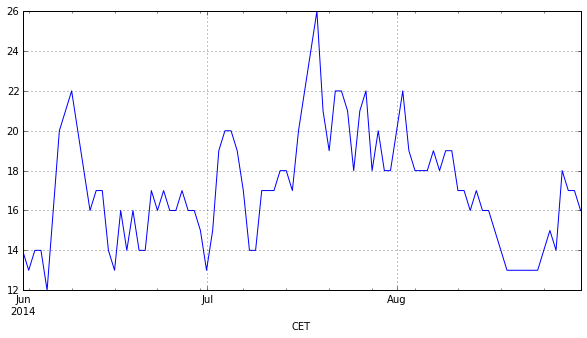

In [39]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Well looking at the graph the second half of July looks good for mean temperatures over 20 degrees C so let's also put precipitation on the graph too:

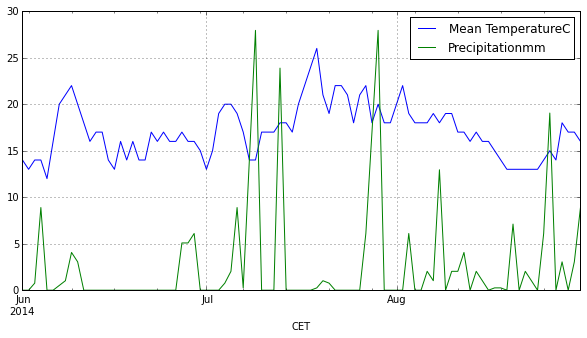

In [40]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The second half of July is still looking good, with just a couple of peaks showing heavy rain. Lets have a closer look by just plotting mean temperature and precipitation for July.  

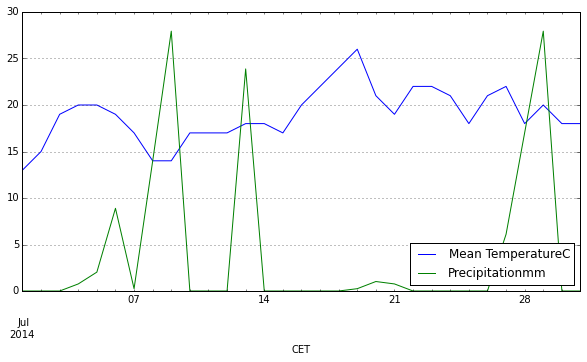

In [41]:
july = summer.ix[datetime(2014,7,1) : datetime(2014,7,31)]
july[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, second half of July looks not bad, two-three days that have significant rain, between the 27th and the 29th and few days(5) when the mean temperature drops below 20 degrees, but still higher than 15.

## Conclusions

The graphs have shown the volatility of a Belgian summer, but a couple of weeks were found when the weather wasn't too bad in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years.